In [11]:
# set path

rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = rootdir + 'Fellow-CERN/SAD/ATF2/Energy/'
os.chdir(workdir)
import random as rand

from matplotlib.ticker import AutoMinorLocator

In [7]:
dat0 = loadtxt('./data/twiss_10bx1by_May092019.dat')
s, bx1, by1, ex1, ey1 = transpose(dat0)

dat0 = loadtxt('./data/twiss_20bx0p25by_May092019.dat')
s, bx2, by2, ex2, ey2 = transpose(dat0)

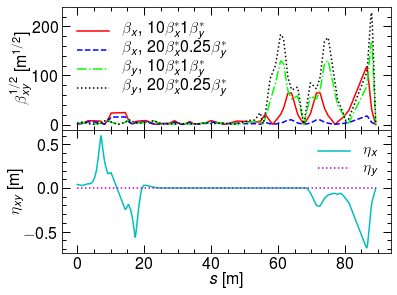

In [228]:
# twiss at atf2
fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace=0)
axs[0].plot(s, sqrt(bx1), label=r'$\beta_x$, 10$\beta_x^*$1$\beta_y^*$')
axs[0].plot(s, sqrt(bx2), label=r'$\beta_x$, 20$\beta_x^*$0.25$\beta_y^*$')
axs[0].plot(s, sqrt(by1), label=r'$\beta_y$, 10$\beta_x^*$1$\beta_y^*$')
axs[0].plot(s, sqrt(by2), label=r'$\beta_y$, 20$\beta_x^*$0.25$\beta_y^*$')
axs[0].set_ylabel(r'$\beta_{xy}^{1/2}$ [m$^{1/2}$]')
axs[0].legend(loc='best', frameon=False)

axs[1].plot(s, ex1, 'c-',label=r'$\eta_x$')
axs[1].plot(s, ey1, 'm:',label=r'$\eta_y$')
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'$\eta_{xy}$ [m]')
axs[1].legend(loc='best', frameon=False)

# fig.tight_layout()
plt.show()
fig.savefig('./figure/ATF2_twiss_nominal_ultralow.pdf', bbox_inches='tight')

In [125]:
# 10bx1by
dat0=loadtxt('./data/Twiss_dE_IP_10bx1by_ideal.dat')
dp, bx, ax, by, ay, pex, pey, r1, r2, r3, r4 = transpose(dat0)

dat0 = loadtxt('./data/SIGY_dE_IP_10bx1by_ideal_cal.dat')
dp, sigy_ideal_cal = transpose(dat0)

dat0 = loadtxt('./data/SIGY_dE_IP_10bx1by_ideal_track.dat')
dp, sigy_ideal_tr = transpose(dat0)

dat0 = loadtxt('./data/SIGY_IP_10bx1by_skerr_cal.dat')
dp, sigy_err_cal_m, sigy_err_cal_std = transpose(dat0)

dat0 = loadtxt('./data/SIGY_IP_10bx1by_skerr_cal_ratio.dat')
dp, sigy_err_cal_ratio_m, sigy_err_cal_ratio_std = transpose(dat0)

dat0 = loadtxt('./data/SIGY_IP_10bx1by_skerr_track.dat')
dp, sigy_err_tr_m, sigy_err_tr_std = transpose(dat0)

dat0 = loadtxt('./data/SIGY_IP_10bx1by_skerr_track_ratio.dat')
dp, sigy_err_tr_ratio_m, sigy_err_tr_ratio_std = transpose(dat0)

In [ ]:
# 10bx1by adv

In [133]:
#25bx0.25by
dat0=loadtxt('./data/Twiss_25bx0p25by_id.dat')
dp_ul, bx_ul, ax_ul, by_ul, ay_ul, pex_ul, pey_ul, r1_ul, r2_ul, r3_ul, r4_ul = transpose(dat0)

dat0 = loadtxt('./data/SIGY_25bx0p25by_id_cal.dat')
dp_ul, sigy_ul_ideal_cal = transpose(dat0)

dat0 = loadtxt('./data/SIGY_25bx0p25by_id_track.dat')
dp_ul, sigy_ul_ideal_tr = transpose(dat0)

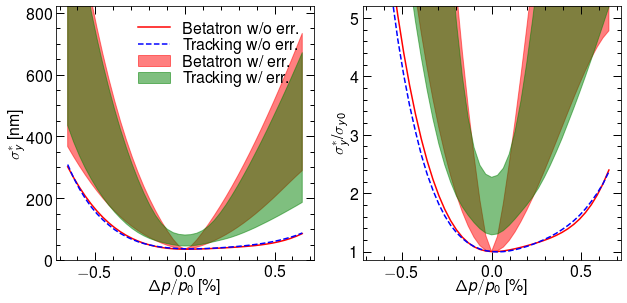

In [145]:
emy = 1.2e-11
sigp = 7e-4
# 10bx1by

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp*1e2, sqrt(by*emy)*1e9, label=r'Betatron w/o err.')
ax1.plot(dp*1e2, sigy_ideal_tr*1e9, label=r'Tracking w/o err.')
ax1.fill_between(dp*1e2, (sigy_err_cal_m-sigy_err_beta_std)*1e9, (sigy_err_cal_m+sigy_err_cal_std)*1e9, color='r', alpha=0.5, label=r'Betatron w/ err.')
ax1.fill_between(dp*1e2, (sigy_err_tr_m-sigy_err_tr_std)*1e9, (sigy_err_tr_m+sigy_err_tr_std)*1e9, color='g', alpha=0.5, label=r'Tracking w/ err.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\sigma_y^*$ [nm]')
ax1.set_ylim(0, 820)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp*1e2, sqrt(by*emy)/sqrt(by[20]*emy), label=r'$\sqrt{\varepsilon_y\beta_y}$')
ax2.plot(dp*1e2, sigy_ideal_tr/sigy_ideal_tr[20], label=r'Tracking')
ax2.fill_between(dp*1e2, (sigy_err_cal_ratio_m-sigy_err_cal_ratio_std), (sigy_err_cal_ratio_m+sigy_err_cal_ratio_std), color='r', alpha=0.5)
ax2.fill_between(dp*1e2, (sigy_err_tr_ratio_m-sigy_err_tr_ratio_std), (sigy_err_tr_ratio_m+sigy_err_tr_ratio_std), color='g', alpha=0.5)
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\sigma_y^*$/$\sigma_{y0}$')
ax2.set_ylim(0.85, 5.2)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
# ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/IPBW_sigy_10bx1by.pdf')
# mainly due to beam waist shift?
# contribution from aberrations becomes insignficant for large beam size!
# sigy0 should be the design beam size
# narrow beam size bandwidth than beta function bandwithd

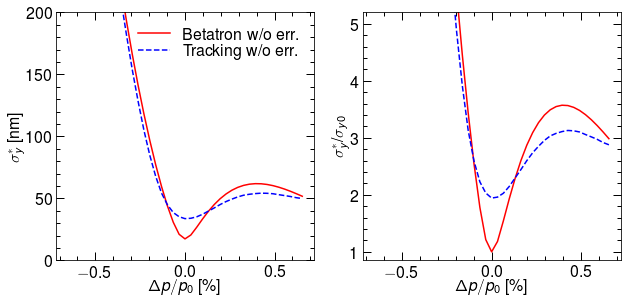

In [147]:
emy = 1.2e-11
sigp = 7e-4

# 25bx0.25by
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp_ul*1e2, sqrt(by_ul*emy)*1e9, label=r'Betatron w/o err.')
ax1.plot(dp_ul*1e2, sigy_ul_ideal_tr*1e9, label=r'Tracking w/o err.')
#ax1.fill_between(dp*1e2, (sigy_err_cal_m-sigy_err_beta_std)*1e9, (sigy_err_cal_m+sigy_err_cal_std)*1e9, color='r', alpha=0.5, label=r'Betatron w/ err.')
#ax1.fill_between(dp*1e2, (sigy_err_tr_m-sigy_err_tr_std)*1e9, (sigy_err_tr_m+sigy_err_tr_std)*1e9, color='g', alpha=0.5, label=r'Tracking w/ err.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\sigma_y^*$ [nm]')
ax1.set_ylim(0, 200)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp_ul*1e2, sqrt(by_ul*emy)/sqrt(by_ul[20]*emy), label=r'$\sqrt{\varepsilon_y\beta_y}$')
ax2.plot(dp_ul*1e2, sigy_ul_ideal_tr/sqrt(by_ul[20]*emy), label=r'Tracking')
#ax2.fill_between(dp*1e2, (sigy_err_cal_ratio_m-sigy_err_cal_ratio_std), (sigy_err_cal_ratio_m+sigy_err_cal_ratio_std), color='r', alpha=0.5)
#ax2.fill_between(dp*1e2, (sigy_err_tr_ratio_m-sigy_err_tr_ratio_std), (sigy_err_tr_ratio_m+sigy_err_tr_ratio_std), color='g', alpha=0.5)
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\sigma_y^*$/$\sigma_{y0}$')
ax2.set_ylim(0.85, 5.2)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
# ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
#fig.savefig('./figure/IPBW_sigy_25bx0p25by.pdf')

In [221]:
dat0 = loadtxt('./data/bystar_10bx1by_err.dat')
dp, bystar_m, bystar_std = transpose(dat0)

dat0 = loadtxt('./data/w_10bx1by_err.dat')
dp, w_m, w_std = transpose(dat0)

dat0 = loadtxt('./data/bystar_25bx0p25by_err.dat')
dp_ul, bystar_ul_m, bystar_ul_std = transpose(dat0)

dat0 = loadtxt('./data/w_25bx0p25by_err.dat')
dp_ul, w_ul_m, w_ul_std = transpose(dat0)

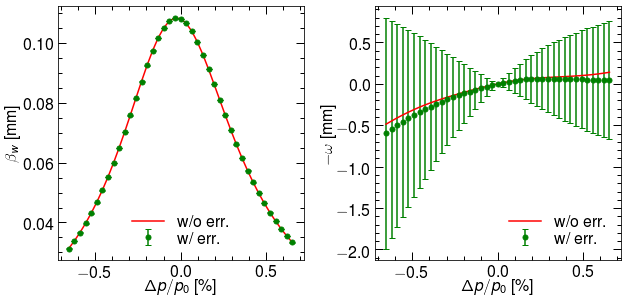

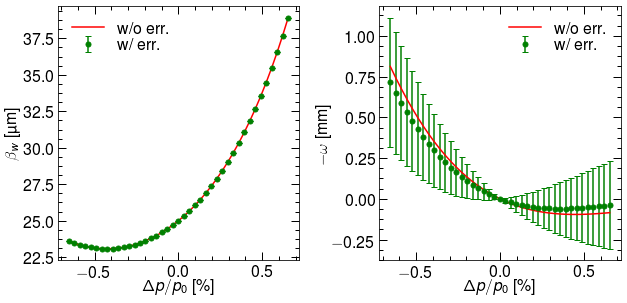

In [225]:
# beam waist
# -> 10bx1by
bystar = by/(1+ay**2)
ds = -ay*bystar
# -> 25bx0.25by
bystar_ul = by_ul/(1+ay_ul**2)
ds_ul = -ay_ul*bystar_ul

# 10bx1by
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp*1e2, bystar*1e3, 'r-', label=r'w/o err.')
ax1.errorbar(dp*1e2, bystar_m*1e3, yerr=bystar_std*1e3, fmt='go', ms=5, capsize=3, label=r'w/ err.')
# ax1.plot(dp_ul*1e2, 4*bystar_ul*1e3, 'b--', label=r'0.25$\beta_y^*$')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\beta_w$ [mm]')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp*1e2, ds*1e3, 'r-', label=r'w/o err.')
ax2.errorbar(dp*1e2, w_m*1e3, yerr=w_std*1e3, fmt='go', ms=5, capsize=3, label=r'w/ err.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$-\omega$ [mm]')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/waistshift_ver_10bx1by.pdf')

# 25bx0.25by
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp_ul*1e2, bystar_ul*1e6, 'r-', label=r'w/o err.')
ax1.errorbar(dp_ul*1e2, bystar_ul_m*1e6, yerr=bystar_ul_std*1e3, fmt='go', ms=5, capsize=3, label=r'w/ err.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\beta_w$ [\si{\um}]')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp_ul*1e2, ds_ul*1e3, 'r-', label=r'w/o err.')
ax2.errorbar(dp_ul*1e2, w_ul_m*1e3, yerr=w_ul_std*1e3, fmt='go', ms=5, capsize=3, label=r'w/ err.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$-\omega$ [mm]')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/waistshift_ver_25bx0p25by.pdf')

In [27]:
# bety* with sextupoles off
dat0 = loadtxt('./data/Twiss_dE_IP_10bx1by_ideal_linear.dat')
dp_li, bx_li, ax_li, by_li, ay_li, pex_li, pey_li, r1_li, r2_li, r3_li, r4_li = transpose(dat0)

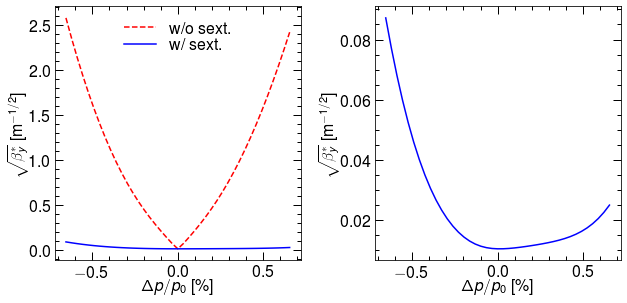

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dp*1e2, sqrt(by_li), '--', label='w/o sext.')
ax1.plot(dp*1e2, sqrt(by), '-', label='w/ sext.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\sqrt{\beta_y^*}$ [m$^{-1/2}$]')
#ax1.set_xlim(-0.11, 0.11)
#ax1.set_ylim(0, 0.22)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
ax1.legend(loc='best', frameon=False)

ax2.plot(dp*1e2, sqrt(by), 'b-', label='Simu.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\sqrt{\beta_y^*}$ [m$^{-1/2}$]')
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
# ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/bety_ip_10bx1by_sext.pdf')

In [163]:
# check off-momentum orbit distortion
# data structure: s, orb[-5kHz], ..., orb[5kHz]
orbx = loadtxt('./data/Orbx_10bx1by_id.dat')
orby = loadtxt('./data/Orby_10bx1by_id.dat')

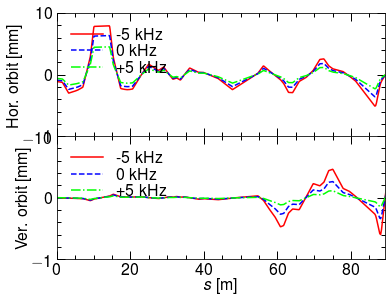

In [227]:
fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace=0)
axs[0].plot(orbx[0], orbx[1]*1e3, label='-5 kHz')
axs[0].plot(orbx[0], orbx[6]*1e3, label=' 0 kHz')
axs[0].plot(orbx[0], orbx[11]*1e3, label='+5 kHz')
axs[0].set_ylabel(r'Hor. orbit [mm]')
axs[0].set_xlim(0, 89.3)
axs[0].set_ylim(-10, 10)
axs[0].legend(loc='best', frameon=False)

axs[1].plot(orby[0], orby[1]*1e3, label='-5 kHz')
axs[1].plot(orby[0], orby[6]*1e3, label=' 0 kHz')
axs[1].plot(orby[0], orby[11]*1e3, label='+5 kHz')
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'Ver. orbit [mm]')
axs[1].set_xlim(0, 89.3)
axs[1].set_ylim(-1, 1)
axs[1].legend(loc='best', frameon=False)

# fig.tight_layout()
plt.show()
fig.savefig('./figure/orbit_adv.pdf')

In [4]:
dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by.dat')
dE_ul, sigy_ul = transpose(dat0)

dat0 = loadtxt('data/SIGY_dE_IP_10bx1by.dat')
dE_nm, sigy_nm = transpose(dat0)

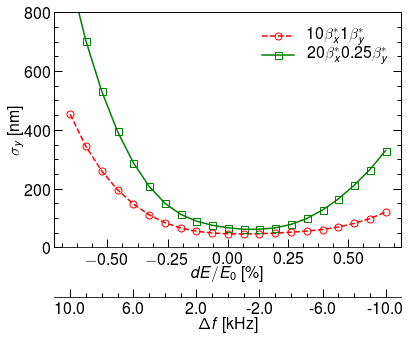

In [9]:
alphac = 2.14e-3;
freq0 = 714e6; # MHz
freq2p= -1/freq0/alphac;
    
matplotlib.rcParams['figure.figsize'] = (6, 5)

ax1 = plt.subplot(1,1,1)
ax1.plot(dE_nm*1e2, sigy_nm*1e9, 'ro--', mfc='None', ms=7, label=r'10$\beta_x^*$1$\beta_y^*$')
ax1.plot(dE_ul*1e2, sigy_ul*1e9, 'gs-', mfc='None', ms=7, label=r'20$\beta_x^*$0.25$\beta_y^*$')
ax1.set_xlabel(r'$dE/E_0$ [\%]')
ax1.set_ylabel(r'$\sigma_y$ [nm]')
ax1.set_ylim(0, 800)
ax1.legend(loc='best', frameon=False)

ax2 = ax1.twiny()
xlab2 = np.arange(-10, 10.1, 4)
xlab2_pos = -xlab2*1e3*freq2p*1e2
ax2.set_xticks(xlab2_pos)
ax2.set_xticklabels(-xlab2)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel(r'$\Delta{f}$ [kHz]')
ax2.set_xlim(ax1.get_xlim())

plt.tight_layout()
plt.savefig("figure/SIGY_dE_wo_err_demo.pdf")
plt.show()

In [13]:
# 10bx1by
dat0 = loadtxt('data/SIGY_dE_IP_10bx1by_w_SextErr_cal.dat')
# dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by_w_SextErr_cal.dat')
sigy_err_nm = []
for i in range(len(dat0)):
    sigy_err_nm.append([mean(dat0[i,:]), std(dat0[i,:])])
sigy_err_nm = transpose(sigy_err_nm) #

# 10bx1by
dat0 = loadtxt('data/SIGY_dE_IP_10bx1by_w_SextErr_track.dat')
# dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by_w_SextErr_cal.dat')
sigy_err_nmtr = []

for i in range(len(dat0)):
    sigy_err_nmtr.append([mean(dat0[i,:]), std(dat0[i,:])])
sigy_err_nmtr = transpose(sigy_err_nmtr) #

# 20bx0.15by
dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by_w_SextErr_cal.dat')
sigy_err_ul = []
for i in range(len(dat0)):
    sigy_err_ul.append([mean(dat0[i,:]), std(dat0[i,:])])
sigy_err_ul = transpose(sigy_err_ul) #

# 20bx0.15by
# not yet updated
dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by_w_SextErr_track.dat')
sigy_err_ultr = []
for i in range(len(dat0)):
    sigy_err_ultr.append([mean(dat0[i,:]), std(dat0[i,:])])
sigy_err_ultr = transpose(sigy_err_ultr) #

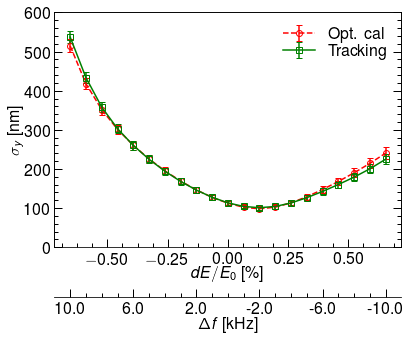

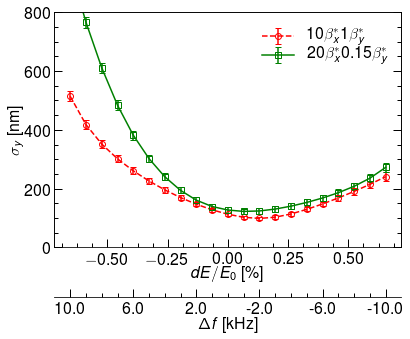

In [15]:
dE_nm = np.arange(-10e3, 10.1e3, 1e3)*(-freq2p) # - b' higher freq. -> lower beam energy
nseed = 100

# 10bx1by, cal vs tracking
ax1 = plt.subplot(1,1,1)
ax1.errorbar(dE_ul*1e2, sigy_err_nm[0]*1e9, yerr=sigy_err_nm[1]*1e9/sqrt(nseed), fmt = 'ro--', capsize=3, mfc = 'None', mec = 'red', label=r'Opt. cal')
ax1.errorbar(dE_ul*1e2, sigy_err_nmtr[0]*1e9, yerr=sigy_err_nmtr[1]*1e9/sqrt(nseed), fmt = 'gs-', capsize=3, mfc = 'None', label=r'Tracking')
ax1.set_xlabel(r'$dE/E_0$ [\%]')
ax1.set_ylabel(r'$\sigma_y$ [nm]')
ax1.set_ylim(0, 600)
# ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)

ax2 = ax1.twiny()
xlab2 = np.arange(-10, 10.1, 4)
xlab2_pos = -xlab2*1e3*freq2p*1e2
ax2.set_xticks(xlab2_pos)
ax2.set_xticklabels(-xlab2)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel(r'$\Delta{f}$ [kHz]')
ax2.set_xlim(ax1.get_xlim())

plt.tight_layout()
plt.savefig("figure/SIGY_dE_w_err_caltrack_nm.pdf")
plt.show()

# 20bx0.15by, cal vs tracking

# 10bx1by vs. 20bx0.15by
ax1 = plt.subplot(1,1,1)
ax1.errorbar(dE_nm*1e2, sigy_err_nm[0]*1e9, yerr=sigy_err_nm[1]*1e9/sqrt(nseed), fmt = 'ro--', capsize=3, mfc = 'None', mec = 'red', label=r'10$\beta_x^*$1$\beta_y^*$')
ax1.errorbar(dE_ul*1e2, sigy_err_ul[0]*1e9, yerr=sigy_err_ul[1]*1e9/sqrt(nseed), fmt = 'gs-', capsize=3, mfc = 'None', label=r'20$\beta_x^*$0.15$\beta_y^*$')
ax1.set_xlabel(r'$dE/E_0$ [\%]')
ax1.set_ylabel(r'$\sigma_y$ [nm]')
ax1.set_ylim(0, 800)
# ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)

ax2 = ax1.twiny()
xlab2 = np.arange(-10, 10.1, 4)
xlab2_pos = xlab2*1e3*freq2p*1e2
ax2.set_xticks(-xlab2_pos)
ax2.set_xticklabels(-xlab2)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel(r'$\Delta{f}$ [kHz]')
ax2.set_xlim(ax1.get_xlim())

plt.tight_layout()
plt.savefig("figure/SIGY_dE_w_err_demo.pdf")
plt.show()